In [6]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

from tabulate import tabulate
import warnings
warnings.filterwarnings('ignore')

In [7]:
df=pd.read_csv("DS3_C6_S1_Regression_StoreSales_Data_Project.csv")
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.074402,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.064299,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


In [4]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,14204.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.793380,0.070301,141.004977,1997.830681,2181.288914
std,4.651716,0.048621,62.086938,8.371664,1706.499616
min,4.555000,0.003575,31.290000,1985.000000,33.290000
25%,8.710000,0.033143,94.012000,1987.000000,834.247400
50%,12.600000,0.062347,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [9]:
df.shape

(14204, 12)

In [10]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [11]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [12]:
df=df.set_index('Item_Identifier')
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,,,,,,,,,,,
FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
FDX07,19.20,Regular,0.074402,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
NCD19,8.93,Low Fat,0.064299,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [13]:
cat=[]
con=[]

for i in df.columns:
    if df[i].nunique()<50:
        cat.append(i)
        
    else:
        con.append(i)

print(tabulate({"Categorical":cat,
                "Continuous": con}, headers = ["categorical", "continuous"]))           

categorical                continuous
-------------------------  -----------------
Item_Fat_Content           Item_Weight
Item_Type                  Item_Visibility
Outlet_Identifier          Item_MRP
Outlet_Establishment_Year  Item_Outlet_Sales
Outlet_Size
Outlet_Location_Type
Outlet_Type


In [14]:
for i in df.columns:
    print(i,':',df[i].nunique())

Item_Weight : 415
Item_Fat_Content : 2
Item_Visibility : 13010
Item_Type : 16
Item_MRP : 8052
Outlet_Identifier : 10
Outlet_Establishment_Year : 9
Outlet_Size : 3
Outlet_Location_Type : 3
Outlet_Type : 4
Item_Outlet_Sales : 3493


In [15]:
cat_col =[]
for x in df.dtypes.index:
    if df.dtypes[x]=='object':
        cat_col.append(x)
cat_col

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

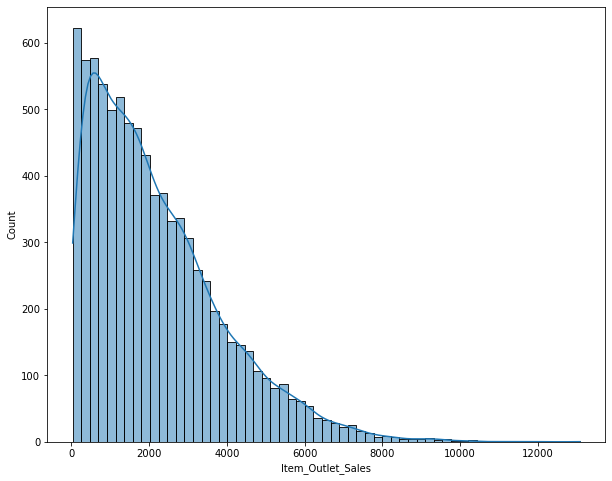

In [16]:

plt.figure(figsize=(10,8))
sns.histplot(df['Item_Outlet_Sales'],palette="magma",kde=True)
plt.show()

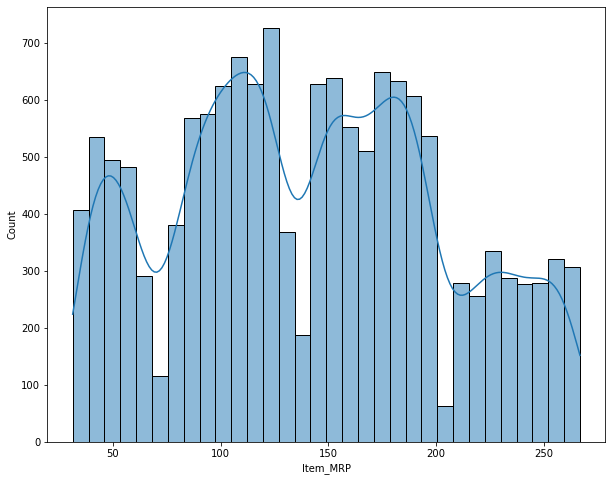

In [17]:

plt.figure(figsize=(10,8))
sns.histplot(df['Item_MRP'],palette="magma",kde=True)
plt.show()

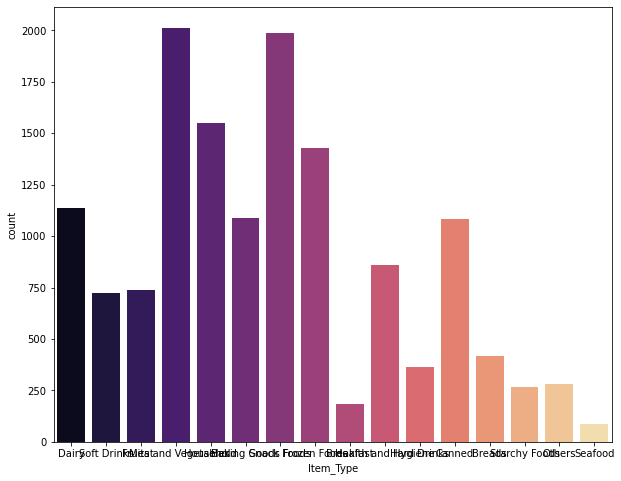

In [19]:
plt.figure(figsize=(10,8))
sns.countplot(data=df,x=df['Item_Type'],palette='magma')
plt.show()



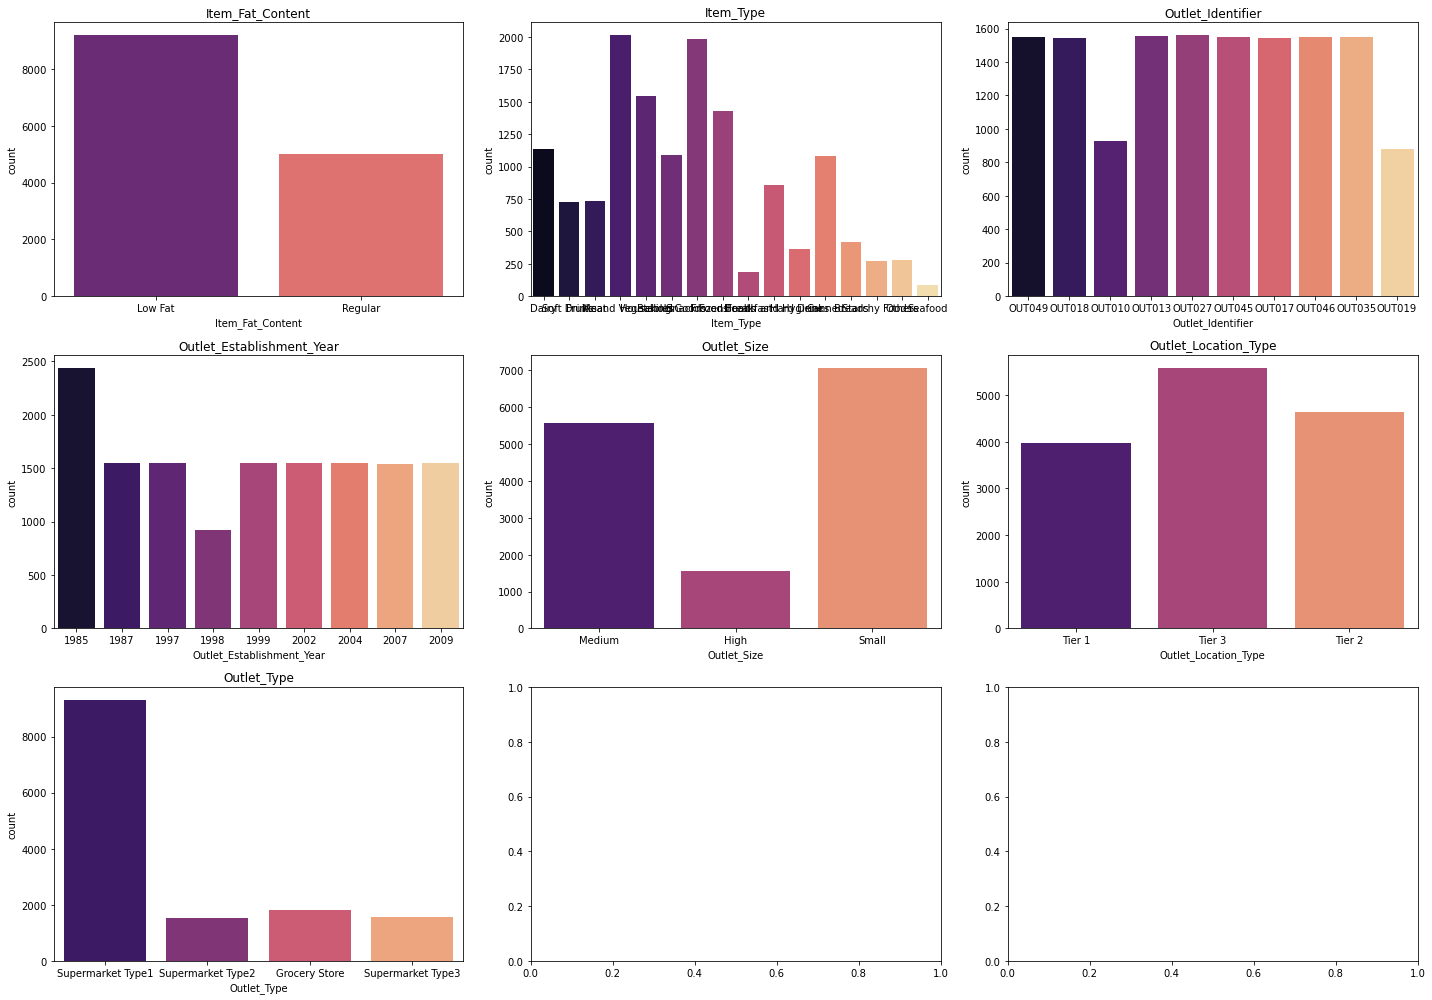

In [20]:
r=3
c=int(len(cat_c)/r)+1

figs,axes =plt.subplots(c,r,figsize=(20,14),tight_layout=True)

for i , ax in zip(cat,axes.flatten()[:len(cat)]):
    sns.countplot(data=df,x=df[i],palette='magma',ax=ax)
    #ax.set_xlabel(i)
    ax.set_title(i)
plt.show()    



In [21]:
from ipywidgets import interact

In [36]:
def cat_info(col): 
    print(f"Unique values in {data_df.columns[col]} are: {data_df.iloc[:,col].unique()}") 
    print(f"Mode of {data_df.columns[col]} is {data_df.iloc[:,col].mode()[0]}") 
    print(f"Number of missing values in {data_df.columns[col]} is {data_df.iloc[:,col].isnull().sum()}") 
    if data_df.iloc[:,col].isnull().sum() > 0:  
        print(f"\nThere are null values in the {data_df.columns[col]} column")

In [38]:
data_df2=df.select_dtypes('object')
def cat_vis(col,palette='magma'):
   
  
    
    sns.countplot(data=data_df2,x=data_df2.iloc[:,col],palette=palette)
    plt.title(data_df2.columns[col])
    plt.show()

interact(cat_vis,col=(0,len(data_df2.columns),5),palette=['viridis'],columns=[cat]) 

interactive(children=(IntSlider(value=0, description='col', max=6, step=5), Dropdown(description='palette', op…

<function __main__.cat_vis(col, palette='magma')>

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

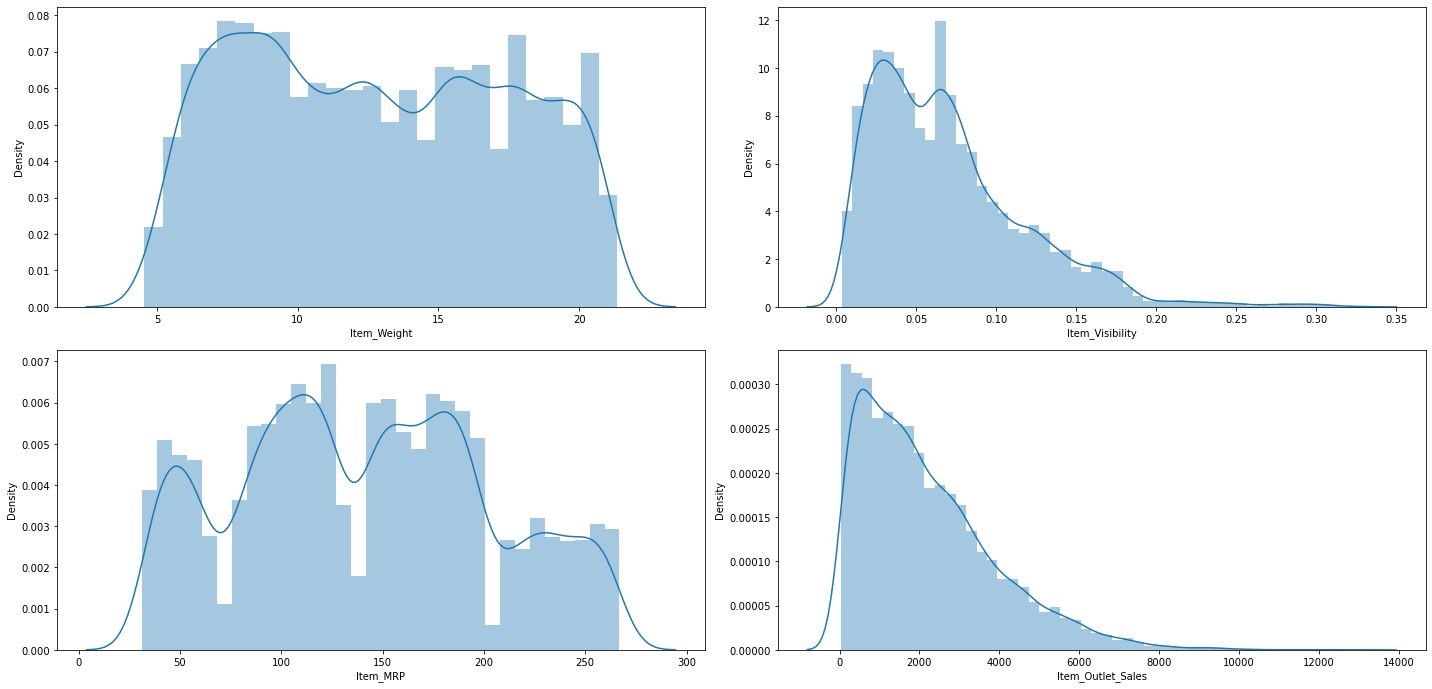

In [60]:
plt.subplots(figsize=(20,14),tight_layout=True)
plt.subplot(3, 2, 1)
sns.distplot(df['Item_Weight'])
plt.subplot(3, 2, 3)
sns.distplot(df['Item_MRP'])
plt.subplot(3, 2, 4)
sns.distplot(df['Item_Outlet_Sales'])
plt.subplot(3,2,2)
sns.distplot(df['Item_Visibility'])

In [61]:
df.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales'],
      dtype='object')

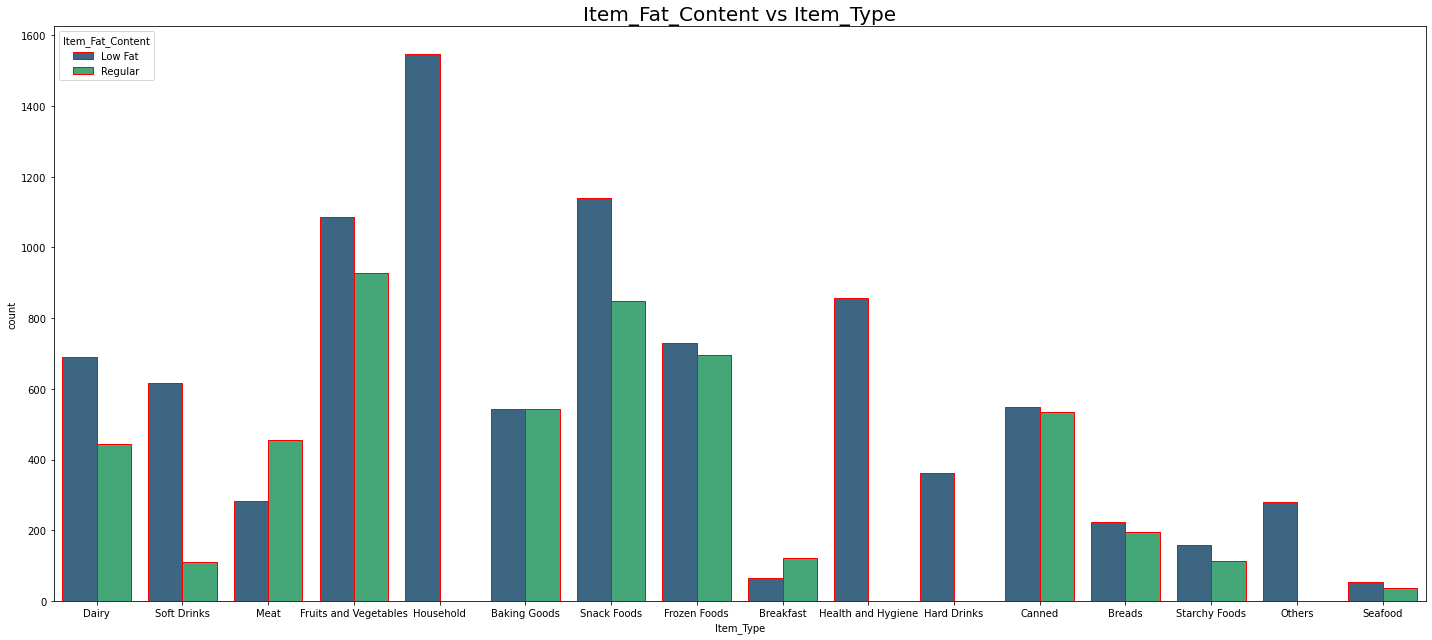

In [73]:
fig, ax = plt.subplots(figsize = (20, 9))
sns.countplot(x = "Item_Type", hue = "Item_Fat_Content", data = df,palette='viridis',edgecolor='r')
plt.title('Item_Fat_Content vs Item_Type',fontsize=20)
plt.tight_layout()
plt.show()

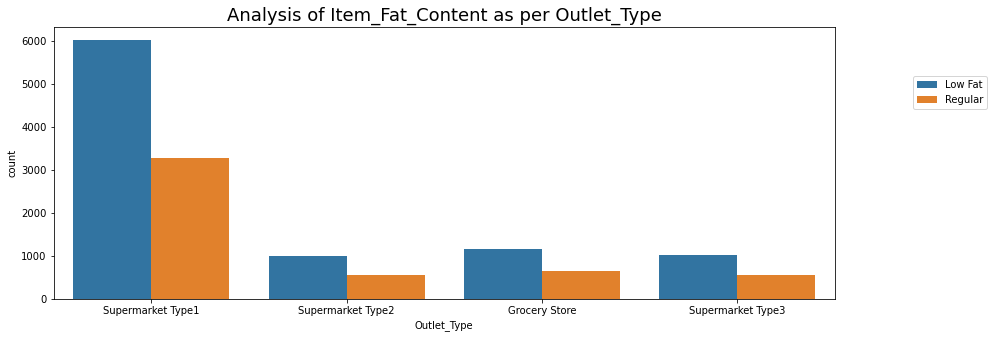

In [75]:
fig, ax = plt.subplots(figsize = (14, 5))
plt.title('Analysis of Item_Fat_Content as per Outlet_Type',fontsize=18)
sns.countplot(x = "Outlet_Type", hue = "Item_Fat_Content", data = df)
plt.legend(loc=(1.1,0.7))
plt.show()

Preprocessing
Label Encoding

In [26]:
from sklearn.preprocessing import LabelEncoder

In [27]:
label=LabelEncoder()

In [28]:
df['Item_Fat_Content']=label.fit_transform(df['Item_Fat_Content'])
df['Item_Type']=label.fit_transform(df['Item_Type'])
df['Outlet_Identifier']=label.fit_transform(df['Outlet_Identifier'])
df['Outlet_Size']=label.fit_transform(df['Outlet_Size'])
df['Outlet_Location_Type']=label.fit_transform(df['Outlet_Location_Type'])
df['Outlet_Type']=label.fit_transform(df['Outlet_Type'])
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,,,,,,,,,,,
FDA15,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
DRC01,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
FDN15,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
FDX07,19.20,1,0.074402,6,182.0950,0,1998,1,2,0,732.3800
NCD19,8.93,0,0.064299,9,53.8614,1,1987,0,2,1,994.7052


In [29]:
validate_data=df.loc[df['Item_Outlet_Sales'].isnull(),:]
validate_data.head()
validate_data.shape
validate_data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,,,,,,,,,,,
FDW58,20.750,0,0.007565,13,107.8622,9,1999,1,0,1,NaN
FDW14,8.300,1,0.038428,4,87.3198,2,2007,2,1,1,NaN
NCN55,14.600,0,0.099575,11,241.7538,0,1998,1,2,0,NaN
FDQ58,7.315,0,0.015388,13,155.0340,2,2007,2,1,1,NaN
FDY38,13.600,1,0.118599,4,234.2300,5,1985,1,2,3,NaN


In [30]:
data=df.loc[df['Item_Outlet_Sales'].notna(),:]
data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,,,,,,,,,,,
FDA15,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
DRC01,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
FDN15,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
FDX07,19.20,1,0.074402,6,182.0950,0,1998,1,2,0,732.3800
NCD19,8.93,0,0.064299,9,53.8614,1,1987,0,2,1,994.7052


In [31]:
data.shape

(8523, 11)

In [32]:
X=data.drop(columns='Item_Outlet_Sales')
y=data['Item_Outlet_Sales']

In [33]:
data.shape

(8523, 11)

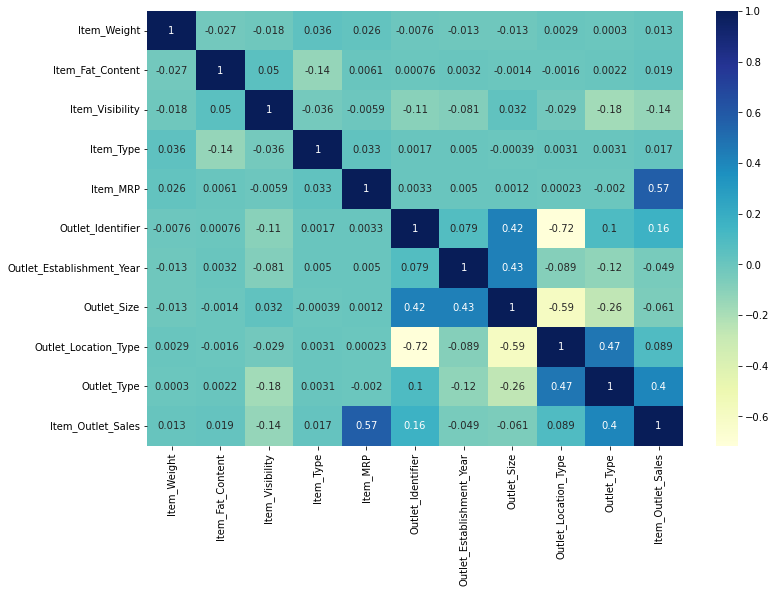

In [34]:
# Let's see the correlation between different variables.
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
scale=StandardScaler()

In [37]:
X1=X.copy()
X2=scale.fit_transform(X1)
X=pd.DataFrame(X2,columns=X1.columns)
X.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,-0.769246,-0.738147,-1.116357,-0.766479,1.747454,1.507813,0.139541,-0.575119,-1.369334,-0.252658
1,-1.496813,1.354743,-1.050092,1.608963,-1.489023,-0.607071,1.334103,-0.575119,1.091569,1.002972
2,0.995858,-0.738147,-1.101738,0.658786,0.010040,1.507813,0.139541,-0.575119,-1.369334,-0.252658
3,1.361794,1.354743,0.080475,-0.291391,0.660050,-1.664513,0.020085,-0.575119,1.091569,-1.508289
4,-0.848890,-0.738147,-0.126740,0.421242,-1.399220,-1.312032,-1.293934,-2.055561,1.091569,-0.252658


In [55]:
names=[]
result=[]

In [56]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [58]:
def error(x,y):
    print('ERRORS')
    print('MAE is :',mean_absolute_error(x,y))
    print('MSE is :',mean_squared_error(x,y))
    rmse=np.sqrt(mean_squared_error(x,y))
    print('RMSE is :',rmse)

In [59]:
from sklearn.model_selection import train_test_split

In [52]:
model_linear=LinearRegression()

In [60]:
names.append(model_linear)
model_linear.fit(x_train,y_train)

LinearRegression()

Model Building
Importing various Other Models .

In [61]:
from sklearn.linear_model import LinearRegression

In [62]:
model_linear=LinearRegression()

In [64]:
names.append(model_linear)
model_linear.fit(x_train,y_train)

LinearRegression()

In [65]:
model_linear.score(x_test,y_test)
result.append(model_linear.score(x_test,y_test))
model_linear.score(x_test,y_test)

0.4891000213264419

In [66]:
model_linear.intercept_

2181.1647676424705

In [67]:
model_linear.coef_

array([-4.79566731e+00,  4.49299514e+01, -8.76131732e+01, -6.20960350e-01,
        9.76059760e+02,  1.66784287e+02, -1.62359113e+01, -2.80114659e+01,
       -6.99906111e+01,  6.79981903e+02])

In [68]:
pd.DataFrame(model_linear.coef_.reshape(-1,1),columns=['slope'],index=X.columns).sort_values(by='slope',ascending=False)

,slope
Item_MRP,976.059760
Outlet_Type,679.981903
Outlet_Identifier,166.784287
Item_Fat_Content,44.929951
Item_Type,-0.620960
Item_Weight,-4.795667
Outlet_Establishment_Year,-16.235911
Outlet_Size,-28.011466
Outlet_Location_Type,-69.990611
Item_Visibility,-87.613173


In [70]:
y_pred=model_linear.predict(x_test)

In [71]:
error(y_test,y_pred)

ERRORS
MAE is : 901.7649857152469
MSE is : 1449173.1888412938
RMSE is : 1203.8160942774


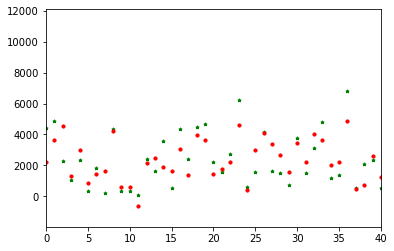

In [72]:
plt.scatter(range(len(y_test)),y_test,s=10,marker='*',c='green',label='Test Data')
plt.scatter(range(len(y_test)),y_pred,s=10,marker='o',c='red',label='Predicted Data')
plt.xlim(0,40)
plt.show()

In [79]:
y_train_pred = model_linear.predict(x_train)
res = (y_train - y_train_pred)

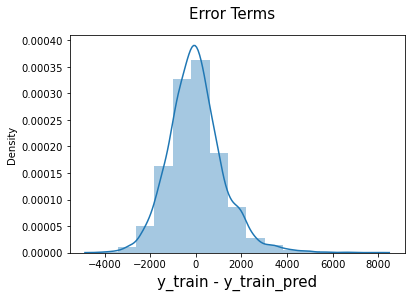

In [80]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()